In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set up plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")
print(f"Polars version: {pl.__version__}")

Libraries imported successfully
Polars version: 1.25.2


In [ ]:
# Define file paths
train_dir = Path("/content/drive/MyDrive/dataset/Train Set")
test_dir = Path("/content/drive/MyDrive/dataset/Test Set")

# Load datasets using Polars with GPU acceleration (if available)
# Polars will automatically use GPU if polars-gpu is installed

print("Loading datasets...")

# Load training sets
packet_train = pl.read_csv(train_dir / "packet_based_trainset.csv")
session_train = pl.read_csv(train_dir / "session_based_trainset.csv")

# Load test sets
packet_test = pl.read_csv(test_dir / "packet_based_testset.csv")
session_test = pl.read_csv(test_dir / "session_based_testset.csv")

print("All datasets loaded successfully!\n")

# Display basic information
print("=" * 70)
print("DATASET SHAPES")
print("=" * 70)
print(f"Packet-based Training Set: {packet_train.shape}")
print(f"Session-based Training Set: {session_train.shape}")
print(f"Packet-based Test Set: {packet_test.shape}")
print(f"Session-based Test Set: {session_test.shape}")
print("=" * 70)

Loading datasets...
All datasets loaded successfully!

DATASET SHAPES
Packet-based Training Set: (4435304, 25)
Session-based Training Set: (488524, 280)
Packet-based Test Set: (1108968, 25)
Session-based Test Set: (122132, 280)


In [ ]:
# Explore Packet-based Training Set
print("=" * 70)
print("PACKET-BASED TRAINING SET")
print("=" * 70)
print("\nFirst 5 rows:")
display(packet_train.head())
print("\nColumn names and types:")
print(packet_train.schema)
print("\nBasic statistics:")
display(packet_train.describe())

PACKET-BASED TRAINING SET

First 5 rows:


Time_cost,Flag_of_packets,Traffic_sequence,Payload_ratio,Length_of_IP_packets,Length_of_TCP_payload,Length_of_TCP_packet_header,Length_of_IP_packet_header,TCP_windows_size_value,Length_of_TCP_segment(packet),Time_difference_between_packets_per_session,Change_values_of_TCP_windows_length_per_session,Interval_of_arrival_time_of_forward_traffic,Interval_of_arrival_time_of_backward_traffic,Time_to_live,Ratio_to_previous_packets_in_each_session,Source_port,Destination_port,source_IP_address,Destination_IP_address,inter_arrival_time_of_forward_traffic_enc,inter_arrival_time_of_backward_traffic_enc,ratio_to_previous_packet_enc,label,unique_link_mark
f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,f64,i64,f64,f64,i64,f64,i64,i64,str,str,f64,f64,f64,i64,i64
3.1958e6,24,360828843,0.6875,128,88,20,20,64240,108,0.000227,0,0.000227,0.0,128,3.2,51561,443,"""10.0.2.105""","""195.113.214.251""",0.0,0.0,0.0,1,6043858606213562857
3.1958e6,24,1285282818,0.789474,190,150,20,20,65535,170,0.014838,0,0.0,0.014838,64,4.75,51561,443,"""10.0.2.105""","""195.113.214.251""",0.0,0.0,1.484375,1,6043858606213562857
3.1958e6,24,360828931,0.63964,111,71,20,20,64090,91,0.000598,-1445,0.015487,0.0,128,0.584211,51561,443,"""10.0.2.105""","""195.113.214.251""",0.015487,0.0,0.584211,1,6043858606213562857
3.1958e6,24,360829002,0.889197,361,321,20,20,64090,341,0.002237,-1445,0.002297,0.0,128,9.025,51561,443,"""10.0.2.105""","""195.113.214.251""",0.002297,0.0,3.252252,1,6043858606213562857
3.1958e6,16,1285282968,0.972603,1460,1420,20,20,65535,1440,0.135858,0,0.0,0.135858,64,36.5,51561,443,"""10.0.2.105""","""195.113.214.251""",0.0,0.138821,4.044321,1,6043858606213562857



Column names and types:
Schema({'Time_cost': Float64, 'Flag_of_packets': Int64, 'Traffic_sequence': Int64, 'Payload_ratio': Float64, 'Length_of_IP_packets': Int64, 'Length_of_TCP_payload': Int64, 'Length_of_TCP_packet_header': Int64, 'Length_of_IP_packet_header': Int64, 'TCP_windows_size_value': Int64, 'Length_of_TCP_segment(packet)': Int64, 'Time_difference_between_packets_per_session': Float64, 'Change_values_of_TCP_windows_length_per_session': Int64, 'Interval_of_arrival_time_of_forward_traffic': Float64, 'Interval_of_arrival_time_of_backward_traffic': Float64, 'Time_to_live': Int64, 'Ratio_to_previous_packets_in_each_session': Float64, 'Source_port': Int64, 'Destination_port': Int64, 'source_IP_address': String, 'Destination_IP_address': String, 'inter_arrival_time_of_forward_traffic_enc': Float64, 'inter_arrival_time_of_backward_traffic_enc': Float64, 'ratio_to_previous_packet_enc': Float64, 'label': Int64, 'unique_link_mark': Int64})

Basic statistics:


statistic,Time_cost,Flag_of_packets,Traffic_sequence,Payload_ratio,Length_of_IP_packets,Length_of_TCP_payload,Length_of_TCP_packet_header,Length_of_IP_packet_header,TCP_windows_size_value,Length_of_TCP_segment(packet),Time_difference_between_packets_per_session,Change_values_of_TCP_windows_length_per_session,Interval_of_arrival_time_of_forward_traffic,Interval_of_arrival_time_of_backward_traffic,Time_to_live,Ratio_to_previous_packets_in_each_session,Source_port,Destination_port,source_IP_address,Destination_IP_address,inter_arrival_time_of_forward_traffic_enc,inter_arrival_time_of_backward_traffic_enc,ratio_to_previous_packet_enc,label,unique_link_mark
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64
"""count""",4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6,"""4435304""","""4435304""",4.435304e6,4.435304e6,4.435304e6,4.435304e6,4.435304e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",7.1108e8,22.014023,2.0705e9,0.814498,679.380277,637.840849,21.539427,20.0,19928.097868,659.380277,0.926599,1.0154e9,0.318733,0.753049,97.012729,9.01361,52715.225852,715.89711,null,null,1.101061,1.146991,1.799248,0.417566,4.6112e18
"""std""",7.5675e8,3.472292,1.2423e9,0.191087,623.968649,624.046184,4.013947,0.0,27078.013245,623.968649,9.535791,2.1384e12,5.43329,8.512394,52.57193,13.029299,12338.59956,2792.563924,null,null,11.607375,13.063827,3.13405,0.493158,2.6644e18
"""min""",24.55013,16.0,1051.0,0.018868,41.0,1.0,20.0,20.0,1.0,21.0,-0.000012,-65525.0,0.0,0.0,10.0,0.0,22.0,22.0,"""10.0.0.45""","""1.1.1.1""",0.0,0.0,0.0,0.0,1.1555e12
"""25%""",282476.122357,24.0,9.82875485e8,0.71831,150.0,107.0,20.0,20.0,237.0,130.0,0.000095,0.0,0.0,0.0,64.0,1.0,51007.0,443.0,null,null,0.0,0.0,0.302128,0.0,2.3038e18
"""50%""",3.1958e6,24.0,2.0358e9,0.895013,385.0,342.0,20.0,20.0,319.0,365.0,0.000806,0.0,0.0,0.00003,64.0,3.2,54774.0,443.0,null,null,0.0,9.5367e-7,0.998,0.0,4.6083e18
"""75%""",1.4991e9,24.0,3.1361e9,0.972222,1460.0,1420.0,20.0,20.0,40716.0,1440.0,0.024436,0.0,0.000523,0.00375,128.0,9.868421,59061.0,443.0,null,null,0.000144,0.001061,1.508706,1.0,6.9183e18
"""max""",1.5790e9,152.0,4.2950e9,0.998584,28240.0,28200.0,44.0,20.0,65535.0,28220.0,2319.384045,4.5036e15,2319.384045,1680.020609,250.0,706.0,65534.0,60986.0,"""95.172.94.62""","""99.86.59.41""",2332.462864,1680.020609,212.820513,1.0,9.2234e18


In [ ]:
# Explore Session-based Training set
print("=" * 70)
print("SESSION-BASED TRAINING SET")
print("=" * 70)
print("\nFirst 5 rows:")
print(session_train.head())
print("\nColumn names and types:")
print(session_train.schema)
print("\nBasic statistics:")
print(session_train.describe()
)

SESSION-BASED TRAINING SET

First 5 rows:
shape: (5, 280)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Total_len ┆ Total_Tim ┆ The_times ┆ The_times ┆ … ┆ Total_len ┆ Total_len ┆ total_pay ┆ IPratio_ │
│ gth_of_IP ┆ e_to_live ┆ _of_chang ┆ _of_chang ┆   ┆ gth_of_fo ┆ gth_of_ba ┆ load_per_ ┆ ratio    │
│ _packet_p ┆ _per_sess ┆ e_of_TCP_ ┆ e_of_payl ┆   ┆ rward_TCP ┆ ckward_TC ┆ session_r ┆ ---      │
│ er_…      ┆ ion       ┆ win…      ┆ oad…      ┆   ┆ _se…      ┆ P_s…      ┆ ati…      ┆ f64      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆          │
│ i64       ┆ i64       ┆ i64       ┆ i64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 10934     ┆ 2150      ┆ 12        ┆ 13        ┆ … ┆ 0.776842  ┆ 0.994552  ┆ 1.0       ┆ 0.194175 │
│ 7109      ┆ 1854      ┆ 23     

In [ ]:
# Function to assess data quality
def assess_data_quality(df, dataset_name):
    print("=" * 70)
    print(f"DATA QUALITY ASSESSMENT: {dataset_name}")
    print("=" * 70)

    # Missing values
    null_counts = df.null_count()
    print("\nMissing Values:")
    print(null_counts)

    # Total missing percentage
    total_cells = df.shape[0] * df.shape[1]
    total_missing = null_counts.sum_horizontal()[0]
    missing_pct = (total_missing / total_cells) * 100 if total_cells > 0 else 0
    print(f"\nTotal Missing: {total_missing} ({missing_pct:.2f}%)")

    # Duplicates
    n_duplicates = df.shape[0] - df.unique().shape[0]
    print(f"Duplicate Rows: {n_duplicates}")

    # Data types
    print(f"\nData Types Distribution:")
    #dictionary
    dtypes = {}
    #going th each col & get datatype
    for col, dtype in df.schema.items():
        dtype_str = str(dtype)
        dtypes[dtype_str] = dtypes.get(dtype_str, 0) + 1
    for dtype, count in dtypes.items():
        print(f"  {dtype}: {count} columns")

    print("=" * 70)
    print()

# Assess all datasets
assess_data_quality(packet_train, "Packet-based Training Set")
assess_data_quality(session_train, "Session-based Training Set")
assess_data_quality(packet_test, "Packet-based Test Set")
assess_data_quality(session_test, "Session-based Test Set")

DATA QUALITY ASSESSMENT: Packet-based Training Set

Missing Values:
shape: (1, 25)
┌───────────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────┬───────────┐
│ Time_cost ┆ Flag_of_pa ┆ Traffic_se ┆ Payload_ra ┆ … ┆ inter_arr ┆ ratio_to_ ┆ label ┆ unique_li │
│ ---       ┆ ckets      ┆ quence     ┆ tio        ┆   ┆ ival_time ┆ previous_ ┆ ---   ┆ nk_mark   │
│ u32       ┆ ---        ┆ ---        ┆ ---        ┆   ┆ _of_backw ┆ packet_en ┆ u32   ┆ ---       │
│           ┆ u32        ┆ u32        ┆ u32        ┆   ┆ ard…      ┆ c         ┆       ┆ u32       │
│           ┆            ┆            ┆            ┆   ┆ ---       ┆ ---       ┆       ┆           │
│           ┆            ┆            ┆            ┆   ┆ u32       ┆ u32       ┆       ┆           │
╞═══════════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════╪═══════════╡
│ 0         ┆ 0          ┆ 0          ┆ 0          ┆ … ┆ 0         ┆ 0         ┆ 0     ┆ 0         │
└───────

In [ ]:
# Check for target/label columns (common names: label, target, class, etc.)
def find_target_column(df):
    target_keywords = ['label', 'target', 'class', 'attack', 'category', 'type']
    for col in df.columns:
        if any(keyword in col.lower() for keyword in target_keywords):
            return col
    return None

# Analyze packet-based training set
packet_target = find_target_column(packet_train)
if packet_target:
    print("=" * 70)
    print(f"PACKET-BASED TRAINING SET - Target Variable: {packet_target}")
    print("=" * 70)

    # Value counts using Polars
    target_dist = packet_train.group_by(packet_target).agg(pl.count()).sort(packet_target)
    print("\nTarget Distribution:")
    print(target_dist)

    # Calculate percentages
    total = packet_train.shape[0]
    target_dist_pct = target_dist.with_columns (
        (pl.col('count') / total * 100).alias('percentage')
    )
    print("\nTarget Distribution (with percentages):")
    print(target_dist_pct)
else:
    print("No clear target column found in packet-based training set")
    print("Available columns:", packet_train.columns)

print("\n")

# Analyze session-based training set
session_target = find_target_column(session_train)
if session_target:
    print("=" * 70)
    print(f"SESSION-BASED TRAINING SET - Target Variable: {session_target}")
    print("=" * 70)

    target_dist = session_train.group_by(session_target).agg(pl.count()).sort(session_target)
    print("\nTarget Distribution:")
    print(target_dist)

    total = session_train.shape[0]
    target_dist_pct = target_dist.with_columns(
        (pl.col('count') / total * 100).alias('percentage')
    )
    print("\nTarget Distribution (with percentages):")
    print(target_dist_pct)
else:
    print("No clear target column found in session-based training set")
    print("Available columns:", session_train.columns)

PACKET-BASED TRAINING SET - Target Variable: label

Target Distribution:
shape: (2, 2)
┌───────┬─────────┐
│ label ┆ count   │
│ ---   ┆ ---     │
│ i64   ┆ u32     │
╞═══════╪═════════╡
│ 0     ┆ 2583272 │
│ 1     ┆ 1852032 │
└───────┴─────────┘

Target Distribution (with percentages):
shape: (2, 3)
┌───────┬─────────┬────────────┐
│ label ┆ count   ┆ percentage │
│ ---   ┆ ---     ┆ ---        │
│ i64   ┆ u32     ┆ f64        │
╞═══════╪═════════╪════════════╡
│ 0     ┆ 2583272 ┆ 58.243403  │
│ 1     ┆ 1852032 ┆ 41.756597  │
└───────┴─────────┴────────────┘


SESSION-BASED TRAINING SET - Target Variable: label

Target Distribution:
shape: (2, 2)
┌───────┬────────┐
│ label ┆ count  │
│ ---   ┆ ---    │
│ i64   ┆ u32    │
╞═══════╪════════╡
│ 0     ┆ 243054 │
│ 1     ┆ 245470 │
└───────┴────────┘

Target Distribution (with percentages):
shape: (2, 3)
┌───────┬────────┬────────────┐
│ label ┆ count  ┆ percentage │
│ ---   ┆ ---    ┆ ---        │
│ i64   ┆ u32    ┆ f64        │
╞═══════╪

In [ ]:
# Preprocessing function using Polars
# Remove duplicates	Keeps only unique rows
# Handle missing data	Fills numeric nulls with median, categorical nulls with mode or "Unknown"
# Remove infinite values	Replaces ∞ with null, then fills with median
# Print summary	Shows shapes and stats for transparency
# Apply to all datasets	Cleans training & test sets

def preprocess_data(df, dataset_name):
    print(f"\nPreprocessing: {dataset_name}")
    print("-" * 70)

    original_shape = df.shape
    print(f"Original shape: {original_shape}")

    # 1. Remove duplicate rows
    df_clean = df.unique()
    duplicates_removed = original_shape[0] - df_clean.shape[0]
    print(f"Duplicates removed: {duplicates_removed}")

    # 2. Handle missing values
    # Get columns with missing values
    null_cols = []
    for col in df_clean.columns:
        if df_clean[col].null_count() > 0:
            null_cols.append(col)

    if null_cols:
        print(f"Columns with missing values: {len(null_cols)}")

        # Strategy: Fill numeric columns with median, categorical with mode
        for col in null_cols:
            dtype = df_clean[col].dtype

            if dtype in [pl.Float32, pl.Float64, pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64]:
                # Numeric: fill with median
                median_val = df_clean[col].median()
                df_clean = df_clean.with_columns(
                    pl.col(col).fill_null(median_val)
                )
            else:
                # Categorical: fill with mode or 'Unknown'
                mode_val = df_clean[col].mode().first()
                if mode_val is not None:
                    df_clean = df_clean.with_columns(
                        pl.col(col).fill_null(mode_val)
                    )
                else:
                    df_clean = df_clean.with_columns(
                        pl.col(col).fill_null("Unknown")
                    )
    else:
        print("No missing values found")

    # 3. Remove infinite values (for numeric columns)
    numeric_cols = [col for col in df_clean.columns
                   if df_clean[col].dtype in [pl.Float32, pl.Float64]]

    if numeric_cols:
        for col in numeric_cols:
            # Replace inf with null, then fill with median
            df_clean = df_clean.with_columns(
                pl.when(pl.col(col).is_infinite())
                .then(None)
                .otherwise(pl.col(col))
                .alias(col)
                #polars dnt know where to save thats why use alias function
            )

            # Fill any nulls created with median
            median_val = df_clean[col].median()
            if median_val is not None:
                df_clean = df_clean.with_columns(
                    pl.col(col).fill_null(median_val)
                )

    print(f"Final shape: {df_clean.shape}")
    print(f"Rows retained: {df_clean.shape[0]/original_shape[0]*100:.2f}%")
    print("-" * 70)

    return df_clean

# Preprocess all datasets
print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)

packet_train_clean = preprocess_data(packet_train, "Packet-based Training Set")
session_train_clean = preprocess_data(session_train, "Session-based Training Set")
packet_test_clean = preprocess_data(packet_test, "Packet-based Test Set")
session_test_clean = preprocess_data(session_test, "Session-based Test Set")

print("\nPreprocessing completed!")

DATA PREPROCESSING

Preprocessing: Packet-based Training Set
----------------------------------------------------------------------
Original shape: (4435304, 25)
Duplicates removed: 0
No missing values found
Final shape: (4435304, 25)
Rows retained: 100.00%
----------------------------------------------------------------------

Preprocessing: Session-based Training Set
----------------------------------------------------------------------
Original shape: (488524, 280)
Duplicates removed: 0
No missing values found
Final shape: (488524, 280)
Rows retained: 100.00%
----------------------------------------------------------------------

Preprocessing: Packet-based Test Set
----------------------------------------------------------------------
Original shape: (1108968, 25)
Duplicates removed: 0
No missing values found
Final shape: (1108968, 25)
Rows retained: 100.00%
----------------------------------------------------------------------

Preprocessing: Session-based Test Set
---------------

In [ ]:
# Get numeric columns for analysis
def get_numeric_columns(df):
    return [col for col in df.columns
            if df[col].dtype in [pl.Float32, pl.Float64, pl.Int8, pl.Int16,
                                 pl.Int32, pl.Int64, pl.UInt8, pl.UInt16,
                                 pl.UInt32, pl.UInt64]]

# Analyze packet-based training set
print("=" * 70)
print("STATISTICAL ANALYSIS: PACKET-BASED TRAINING SET")
print("=" * 70)

numeric_cols_packet = get_numeric_columns(packet_train_clean)
print(f"\nNumber of numeric features: {len(numeric_cols_packet)}")

if numeric_cols_packet[:10]:
# Show first 10 numeric columns
    print("\nDetailed statistics for first 10 numeric features:")
    stats_df = packet_train_clean.select(numeric_cols_packet[:10]).describe()
    print(stats_df)
# Analyze Session-based training set
print("\n" + "=" * 70)
print("STATISTICAL ANALYSIS: SESSION-BASED TRAINING SET")
print("=" * 70)

numeric_cols_session = get_numeric_columns(session_train_clean)
print(f"\nNumber of numeric features: {len(numeric_cols_session)}")

if numeric_cols_session[:10]:
    print("\nDetailed statistics for first 10 numeric features:")
    stats_df = session_train_clean.select(numeric_cols_session[:10]).describe()
    print(stats_df)


STATISTICAL ANALYSIS: PACKET-BASED TRAINING SET

Number of numeric features: 23

Detailed statistics for first 10 numeric features:
shape: (9, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Time_cost ┆ Flag_of_p ┆ Traffic_s ┆ … ┆ Length_of ┆ Length_of ┆ TCP_windo ┆ Length_o │
│ ---       ┆ ---       ┆ ackets    ┆ equence   ┆   ┆ _TCP_pack ┆ _IP_packe ┆ ws_size_v ┆ f_TCP_se │
│ str       ┆ f64       ┆ ---       ┆ ---       ┆   ┆ et_header ┆ t_header  ┆ alue      ┆ gment(pa │
│           ┆           ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ cket)    │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 4.435304e ┆ 4.435304e ┆ 4.43530

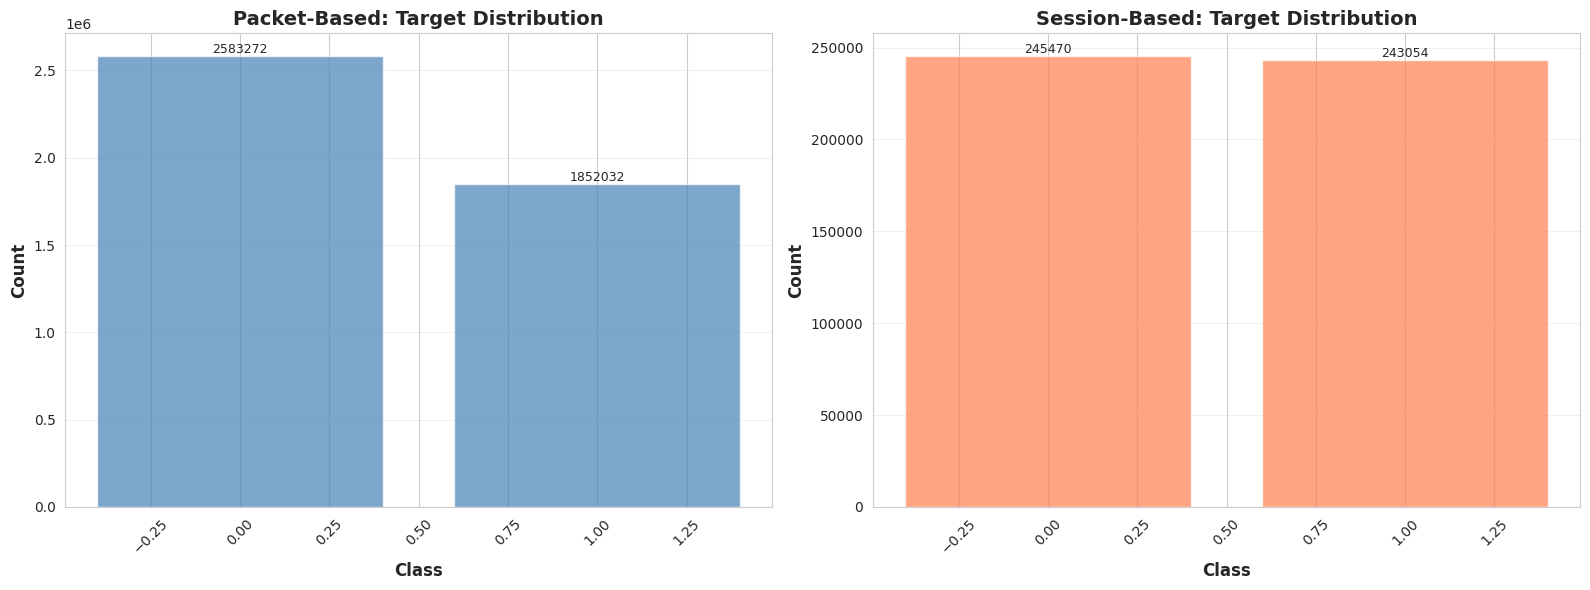

In [ ]:
# Visualization 1: Target Variable Distribution (if exists)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Packet-based
if packet_target:
    target_counts = (
        packet_train_clean
        .group_by(packet_target)
        .agg(pl.count())
        .sort('count', descending=True)
    )

    # Convert to pandas for plotting
    target_counts_pd = target_counts.to_pandas()

    axes[0].bar(range(len(target_counts_pd)), target_counts_pd['count'], color='steelblue', alpha=0.7)
    axes[0].set_xlabel('Class', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Packet-Based: Target Distribution', fontsize=14, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(target_counts_pd['count']):
        axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=9)
else:
    axes[0].text(0.5, 0.5, 'No target variable found', ha='center', va='center', transform=axes[0].transAxes, fontsize=12)
    axes[0].set_title('Packet-Based: Target Distribution', fontsize=14, fontweight='bold')


# Session-based
if session_target:
    target_counts = (
        session_train_clean
        .group_by(session_target)
        .agg(pl.count())
        .sort('count', descending=True)
    )

    # Convert to pandas for plotting
    target_counts_pd = target_counts.to_pandas()

    axes[1].bar(range(len(target_counts_pd)), target_counts_pd['count'], color='coral', alpha=0.7)
    axes[1].set_xlabel('Class', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[1].set_title('Session-Based: Target Distribution', fontsize=14, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(target_counts_pd['count']):
        axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)
else:
    axes[1].text(0.5, 0.5, 'No target variable found', ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Session-Based: Target Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


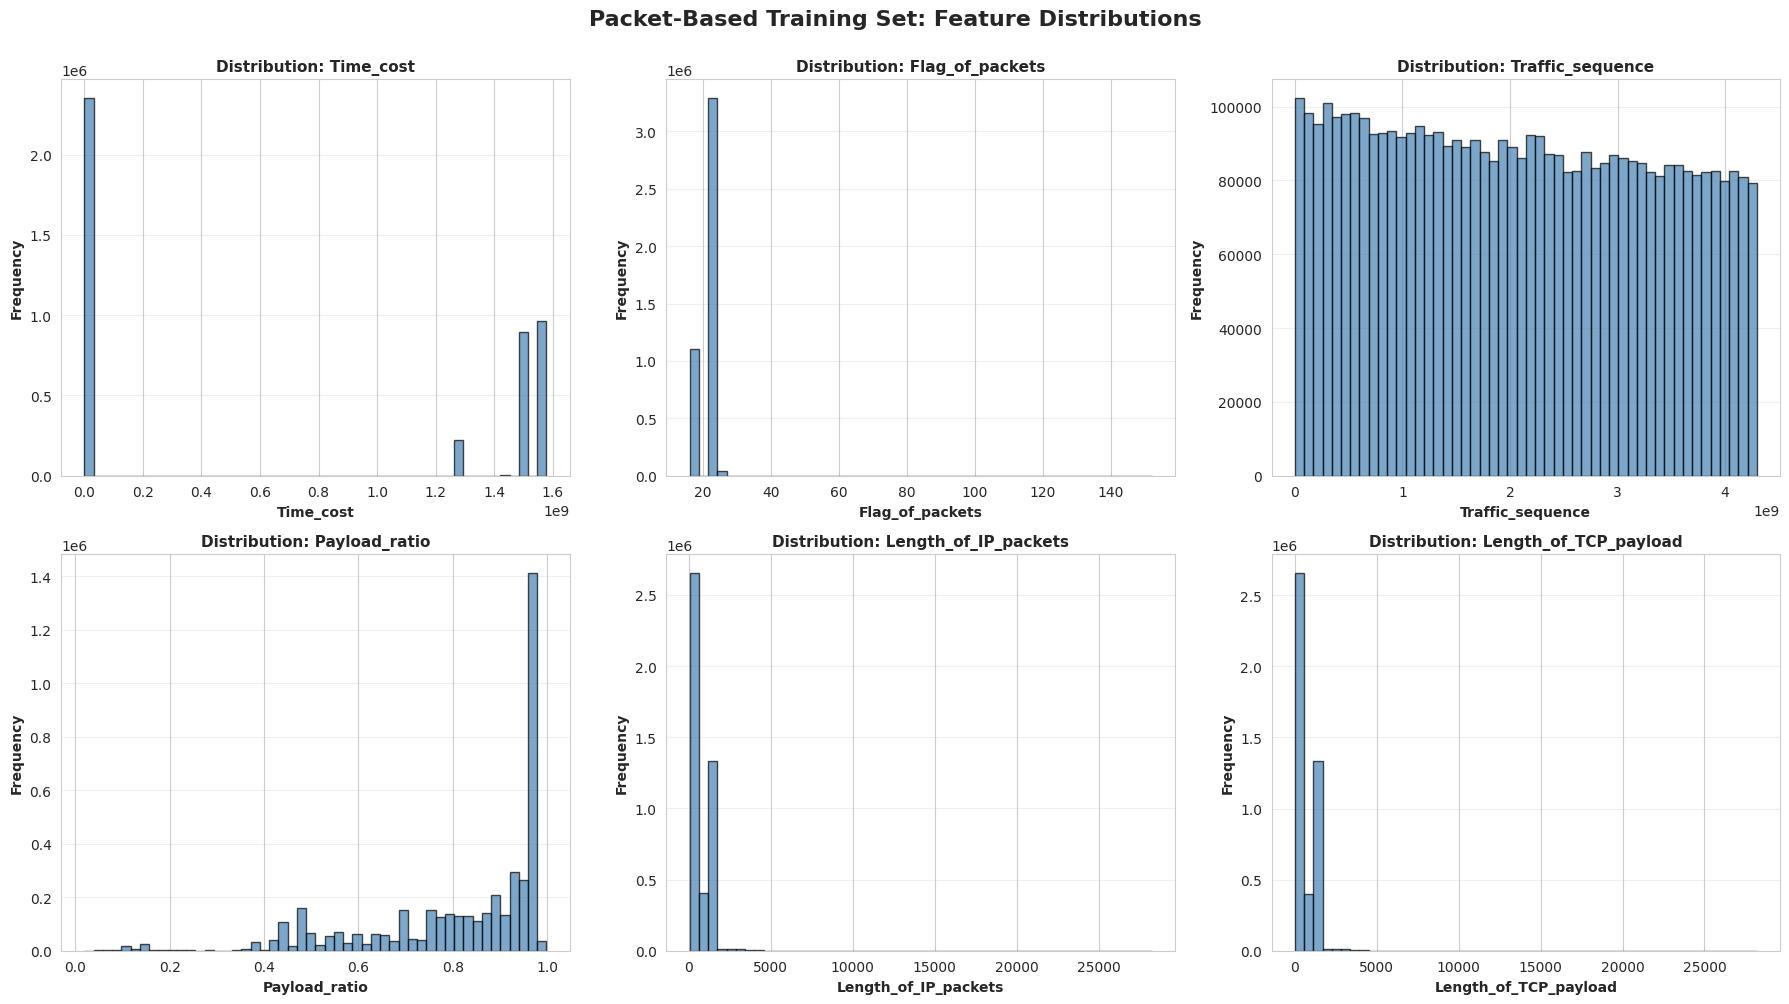

Feature distribution visualization completed


In [ ]:
# Visualization 2: Distribution of numeric features (first 6 features)
if len(numeric_cols_packet) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_packet[:6]):
        data = packet_train_clean[col].to_numpy()

        axes[idx].hist(data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Packet-Based Training Set: Feature Distributions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

    print("Feature distribution visualization completed")
else:
    print(f"Not enough numeric features to visualize (found {len(numeric_cols_packet)})")

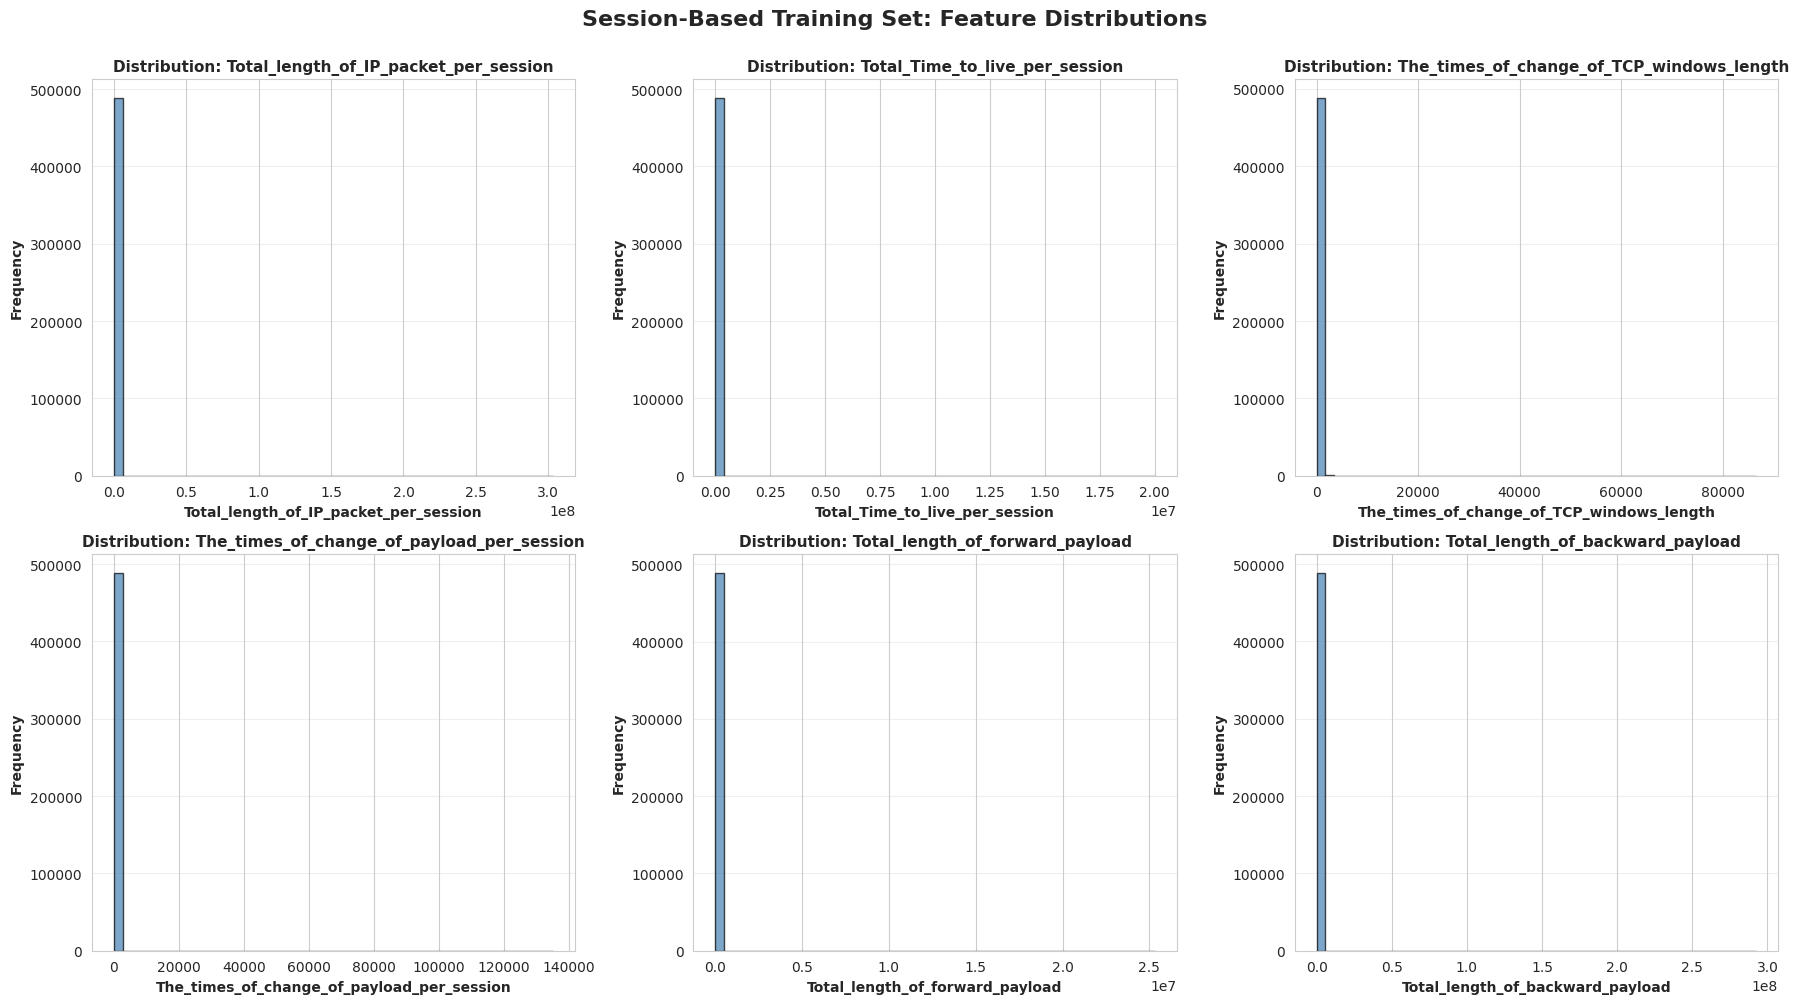

Feature distribution visualization completed


In [ ]:
# Visualization 2: Distribution of numeric features (first 6 features)
if len(numeric_cols_session) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_session[:6]):
        data = session_train_clean[col].to_numpy()

        axes[idx].hist(data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Session-Based Training Set: Feature Distributions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

    print("Feature distribution visualization completed")
else:
    print(f"Not enough numeric features to visualize (found {len(numeric_cols_packet)})")

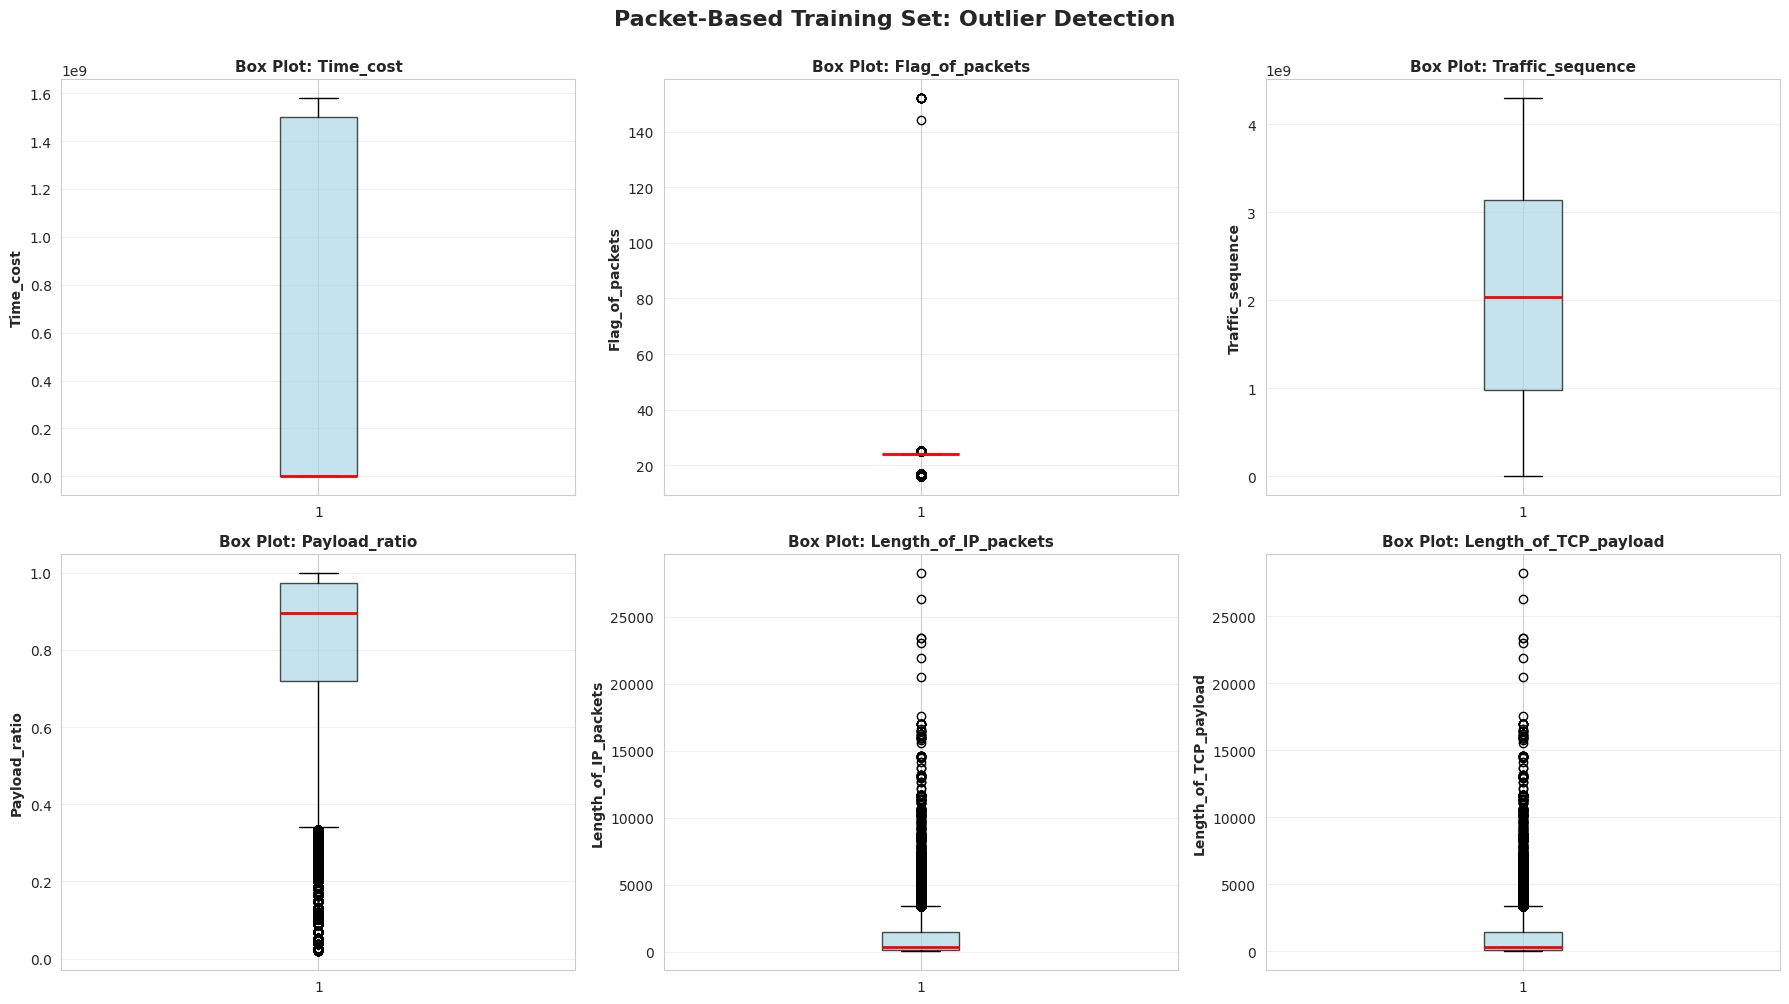

In [ ]:
# Visualization 3: Box plots to detect outliers
if len(numeric_cols_packet) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_packet[:6]):
        # Convert to pandas for easy plotting
        data = packet_train_clean[col].to_pandas()

        axes[idx].boxplot(data, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_ylabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Packet-Based Training Set: Outlier Detection',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric features for box plots (found {len(numeric_cols_packet)})")

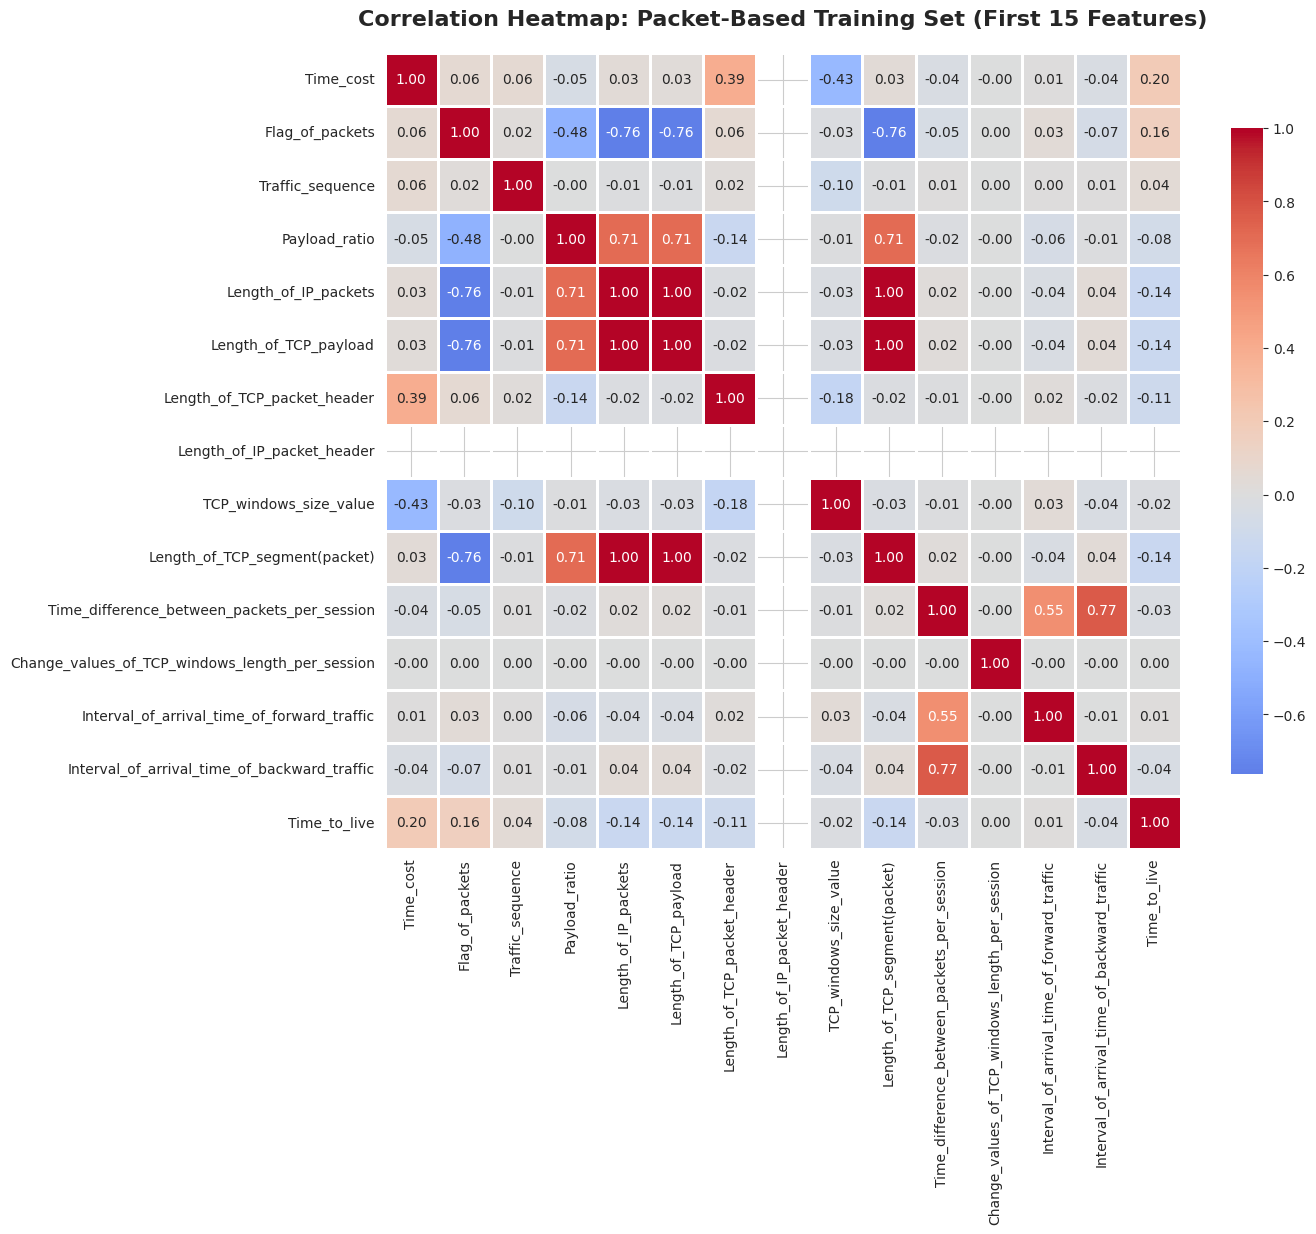

In [ ]:
# Visualization 4: Correlation heatmap for numeric features
if len(numeric_cols_packet) >= 5:
    # Select first 15 numeric columns for correlation analysis
    cols_for_corr = numeric_cols_packet[:15]

    # Calculate correlation matrix using Polars
    corr_data = packet_train_clean.select(cols_for_corr).to_pandas().corr()

    plt.figure(figsize=(14, 12))
    # blus for neg red for posi
    sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap: Packet-Based Training Set (First 15 Features)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric features for correlation analysis (found {len(numeric_cols_packet)})")

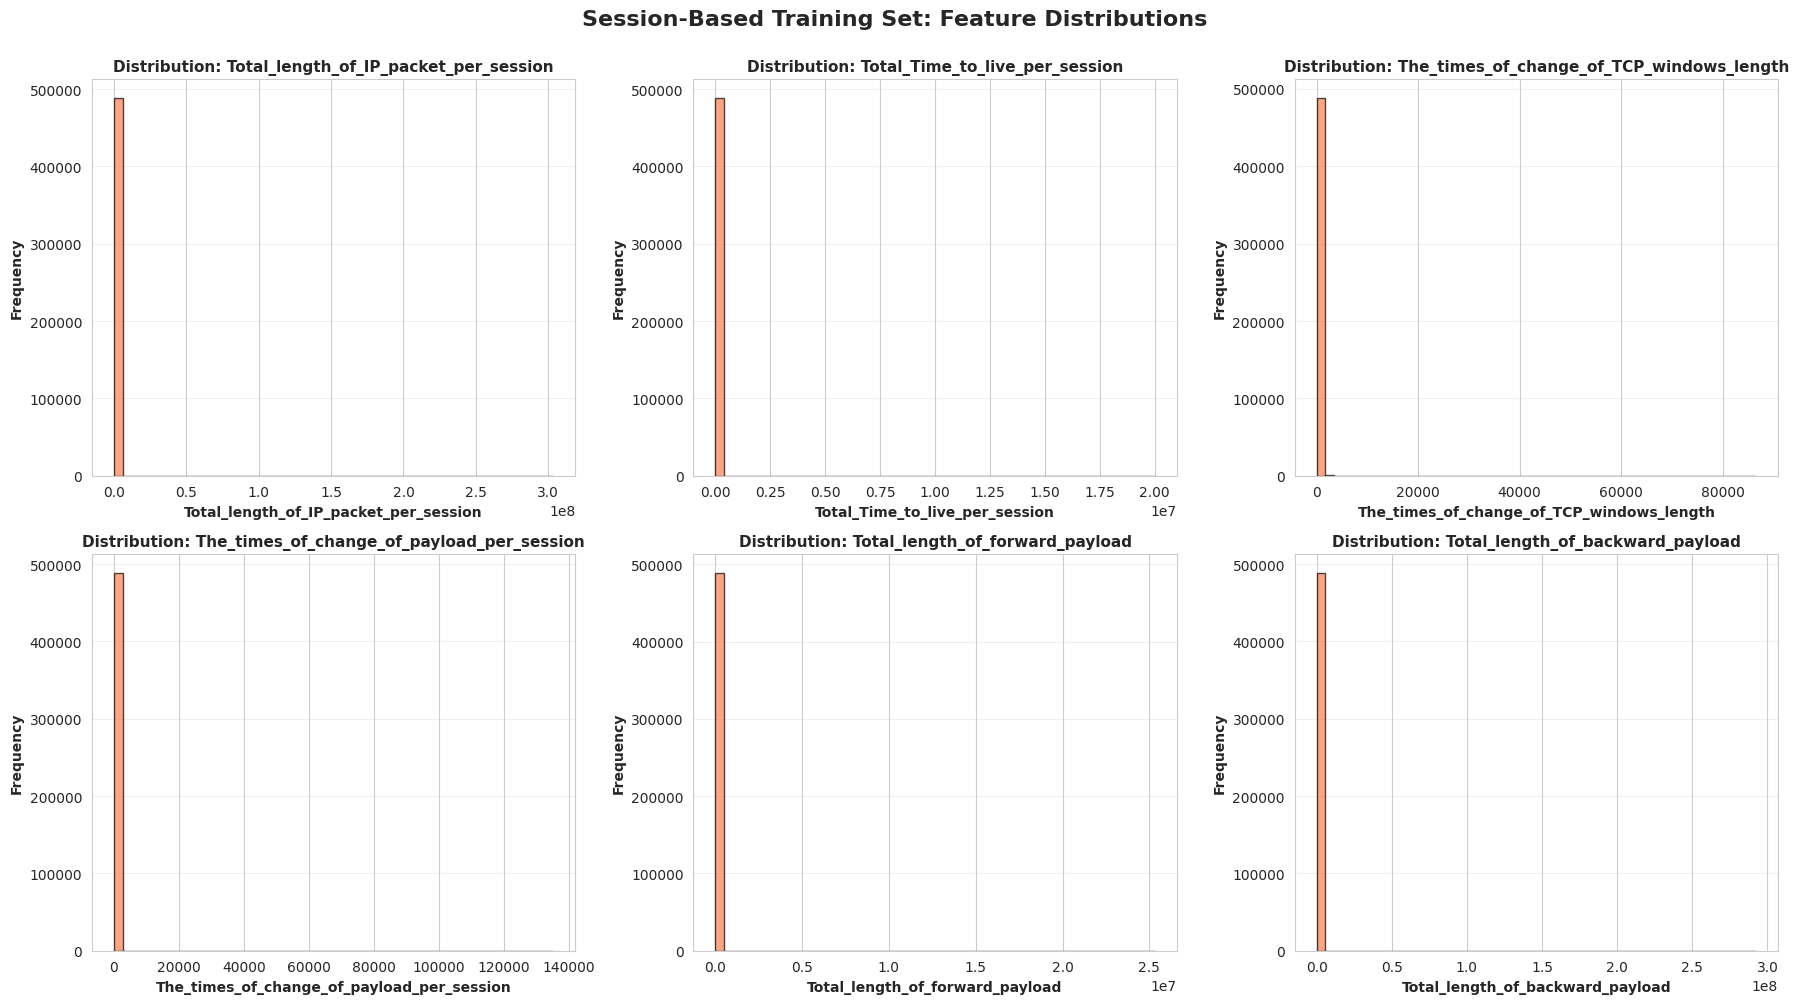

In [ ]:
# Visualization 5: Session-based dataset features
if len(numeric_cols_session) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols_session[:6]):
        data = session_train_clean[col].to_numpy()

        axes[idx].hist(data, bins=50, color='coral', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.suptitle('Session-Based Training Set: Feature Distributions',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric features in session-based data (found {len(numeric_cols_session)})")

In [ ]:
# Analyze variance and skewness of features
def analyze_feature_characteristics(df, dataset_name, numeric_cols):
    print("=" * 70)
    print(f"FEATURE CHARACTERISTICS: {dataset_name}")
    print("=" * 70)

    if len(numeric_cols) == 0:
        print("No numeric features found")
        return

    # Calculate statistics using Polars
    feature_stats = []

    for col in numeric_cols[:20]:  # Analyze first 20 features
        col_data = df[col]

        # Calculate statistics
        mean_val = col_data.mean()
        std_val = col_data.std()
        min_val = col_data.min()
        max_val = col_data.max()

        # Coefficient of variation (if mean != 0)
        cv = (std_val / mean_val * 100) if mean_val != 0 else 0

        feature_stats.append({
            'Feature': col,
            'Mean': mean_val,
            'Std': std_val,
            'Min': min_val,
            'Max': max_val,
            'CV (%)': cv
        })

    # Create DataFrame and display
    stats_df = pl.DataFrame(feature_stats)
    print("\nFeature Statistics (First 20 features):")
    print(stats_df)

    # Identify features with high variance
    high_variance = stats_df.filter(pl.col('CV (%)') > 100).select(['Feature', 'CV (%)']).sort('CV (%)', descending=True)

    if high_variance.shape[0] > 0:
        print(f"\nFeatures with high variability (CV > 100%):")
        print(high_variance)

    # Identify low variance features
    low_variance = stats_df.filter(pl.col('Std') < 0.01).select(['Feature', 'Std'])

    if low_variance.shape[0] > 0:
        print(f"\nLow variance features (Std < 0.01):")
        print(low_variance)

    print("=" * 70)
    print()

# Analyze both datasets
analyze_feature_characteristics(packet_train_clean, "Packet-Based Training Set", numeric_cols_packet)
analyze_feature_characteristics(session_train_clean, "Session-Based Training Set", numeric_cols_session)

FEATURE CHARACTERISTICS: Packet-Based Training Set

Feature Statistics (First 20 features):
shape: (20, 6)
┌──────────────────────────────┬──────────────┬─────────────┬──────────┬─────────────┬─────────────┐
│ Feature                      ┆ Mean         ┆ Std         ┆ Min      ┆ Max         ┆ CV (%)      │
│ ---                          ┆ ---          ┆ ---         ┆ ---      ┆ ---         ┆ ---         │
│ str                          ┆ f64          ┆ f64         ┆ f64      ┆ f64         ┆ f64         │
╞══════════════════════════════╪══════════════╪═════════════╪══════════╪═════════════╪═════════════╡
│ Time_cost                    ┆ 7.1108e8     ┆ 7.5675e8    ┆ 24.55013 ┆ 1.5790e9    ┆ 106.422803  │
│ Flag_of_packets              ┆ 22.014023    ┆ 3.472292    ┆ 16.0     ┆ 152.0       ┆ 15.773093   │
│ Traffic_sequence             ┆ 2.0705e9     ┆ 1.2423e9    ┆ 1051.0   ┆ 4.2950e9    ┆ 60.00088    │
│ Payload_ratio                ┆ 0.814498     ┆ 0.191087    ┆ 0.018868 ┆ 0.998584    

DATASET COMPARISON
shape: (6, 3)
┌───────────────────────┬──────────────┬───────────────┐
│ Metric                ┆ Packet-Based ┆ Session-Based │
│ ---                   ┆ ---          ┆ ---           │
│ str                   ┆ f64          ┆ f64           │
╞═══════════════════════╪══════════════╪═══════════════╡
│ Total Rows (Train)    ┆ 4.435304e6   ┆ 488524.0      │
│ Total Columns (Train) ┆ 25.0         ┆ 280.0         │
│ Numeric Features      ┆ 23.0         ┆ 280.0         │
│ Memory Usage (MB)     ┆ 891.6        ┆ 1055.19       │
│ Total Rows (Test)     ┆ 1.108968e6   ┆ 122132.0      │
│ Total Columns (Test)  ┆ 25.0         ┆ 280.0         │
└───────────────────────┴──────────────┴───────────────┘


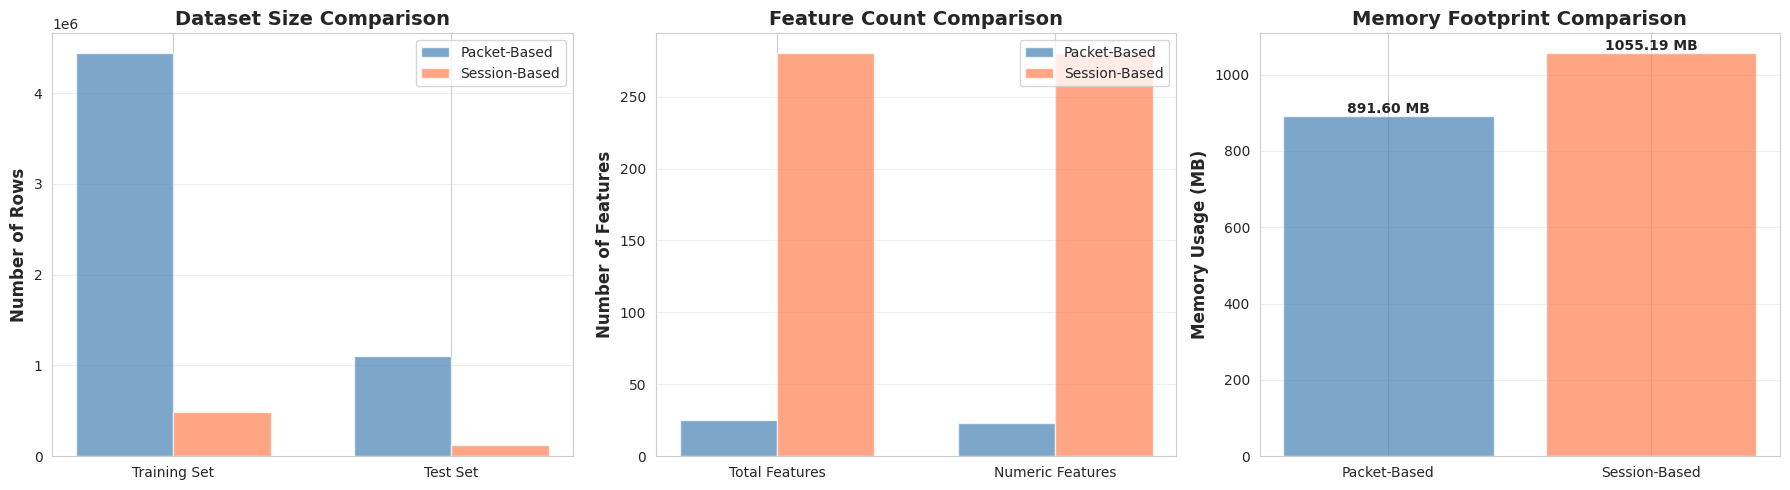

In [ ]:
# Compare dataset characteristics
comparison_data = {
    'Metric': [
        'Total Rows (Train)',
        'Total Columns (Train)',
        'Numeric Features',
        'Memory Usage (MB)',
        'Total Rows (Test)',
        'Total Columns (Test)'
    ],
    'Packet-Based': [
        packet_train_clean.shape[0],
        packet_train_clean.shape[1],
        len(numeric_cols_packet),
        round(packet_train_clean.estimated_size('mb'), 2),
        packet_test_clean.shape[0],
        packet_test_clean.shape[1]
    ],
    'Session-Based': [
        session_train_clean.shape[0],
        session_train_clean.shape[1],
        len(numeric_cols_session),
        round(session_train_clean.estimated_size('mb'), 2),
        session_test_clean.shape[0],
        session_test_clean.shape[1]
    ]
}

# Allow mixed types (ints and floats) in the DataFrame columns
comparison_df = pl.DataFrame(comparison_data, strict=False)

print("=" * 70)
print("DATASET COMPARISON")
print("=" * 70)
print(comparison_df)
print("=" * 70)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Number of rows
categories = ['Training Set', 'Test Set']
packet_rows = [packet_train_clean.shape[0], packet_test_clean.shape[0]]
session_rows = [session_train_clean.shape[0], session_test_clean.shape[0]]

x = np.arange(len(categories))
width = 0.35

axes[0].bar(x - width/2, packet_rows, width, label='Packet-Based', color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, session_rows, width, label='Session-Based', color='coral', alpha=0.7)
axes[0].set_ylabel('Number of Rows', fontsize=12, fontweight='bold')
axes[0].set_title('Dataset Size Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Number of features
categories2 = ['Total Features', 'Numeric Features']
packet_features = [packet_train_clean.shape[1], len(numeric_cols_packet)]
session_features = [session_train_clean.shape[1], len(numeric_cols_session)]

x2 = np.arange(len(categories2))
axes[1].bar(x2 - width/2, packet_features, width, label='Packet-Based', color='steelblue', alpha=0.7)
axes[1].bar(x2 + width/2, session_features, width, label='Session-Based', color='coral', alpha=0.7)
axes[1].set_ylabel('Number of Features', fontsize=12, fontweight='bold')
axes[1].set_title('Feature Count Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(categories2)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Memory usage
memory_data = [
    packet_train_clean.estimated_size('mb'),
    session_train_clean.estimated_size('mb')
]
colors_mem = ['steelblue', 'coral']

axes[2].bar(['Packet-Based', 'Session-Based'], memory_data, color=colors_mem, alpha=0.7)
axes[2].set_ylabel('Memory Usage (MB)', fontsize=12, fontweight='bold')
axes[2].set_title('Memory Footprint Comparison', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

for i, v in enumerate(memory_data):
    axes[2].text(i, v, f'{v:.2f} MB', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()